In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

In [4]:
def sigmoid(x):
    return 1/float((1+np.exp(-x)))

In [5]:
sigmoid(0)

0.5

In [6]:
def inverse_sigmoid(y):
    return -1*np.log((1/y)-1)

In [7]:
p=sigmoid(20)
print(p)
inverse_sigmoid(p)

0.9999999979388463


19.999999966169824

In [8]:
def diff_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

In [9]:
diff_sigmoid(0.81)

0.21309393835692123

In [10]:
def sigmoidd(x):
    sig=[]
    for row in x:
        r=[]
        for value in row:
            r.append(sigmoid(value))
        sig.append(r)
    return sig

In [11]:
def diff_sigmoidd(x):
    difsig=[]
    for row in x:
        r=[]
        for value in row:
            r.append(diff_sigmoid(value))
        difsig.append(r)
    return difsig

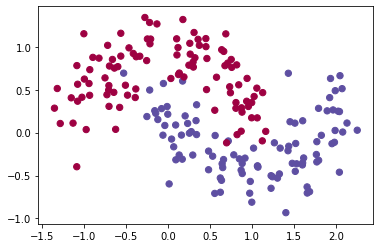

(200, 2)

In [12]:
np.random.seed(0)
X,y=sklearn.datasets.make_moons(200, noise=0.2)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()
b=y
k=[]
for v in y:
    k.append([v])
    
y=np.array(k)

X.shape

#print(y)

In [13]:
y

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
    

In [14]:
print(X)

[[ 0.74346118  0.46465633]
 [ 1.65755662 -0.63203157]
 [-0.15878875  0.25584465]
 [-1.088752   -0.39694315]
 [ 1.768052   -0.25443213]
 [ 1.95416454 -0.12850579]
 [ 0.93694537  0.36597075]
 [ 0.88446589 -0.47595401]
 [ 0.80950246  0.3505231 ]
 [ 1.2278091  -0.64785108]
 [-0.38454276  0.50916381]
 [ 0.09252135 -0.31618454]
 [ 1.79531658 -0.32235591]
 [ 1.43861749 -0.15796611]
 [-0.82364866  0.86822754]
 [ 0.99633397  0.1731019 ]
 [ 0.66388701  0.94659669]
 [ 0.13229471 -0.26032619]
 [ 0.2482245   0.7860477 ]
 [-1.00392102  1.15207238]
 [ 2.08208438  0.00715606]
 [ 0.87081342 -0.4366643 ]
 [ 0.37268327  1.01743002]
 [ 1.26735927 -0.11813675]
 [-0.13270154  1.26653562]
 [ 0.20331     0.19519454]
 [ 1.98373996 -0.11222315]
 [ 1.82749513 -0.03085446]
 [-0.03857867  0.0838378 ]
 [ 0.03351023  0.63113817]
 [ 0.94193283  0.63204507]
 [-0.39131894  0.40925201]
 [ 0.88357043 -0.35868845]
 [-0.01141219  0.30437635]
 [ 0.75877114  0.76057045]
 [ 1.79414416  0.28323389]
 [ 0.56116634 -0.0330033 ]
 

In [15]:
epoch=500 #no. of training iterations
learning_rate=0.1
input_layer_neurons=X.shape[1] #no. of features in dataset
hidden_layer_neurons=3 #no. of hidden layer neurons
output_neurons=1 #number of neurons of output layer

In [16]:
weight_hidden=np.random.uniform(size=(input_layer_neurons,hidden_layer_neurons))
bais_hidden=np.random.uniform(size=(1,hidden_layer_neurons))
weight_output=np.random.uniform(size=(hidden_layer_neurons,output_neurons))
bais_output=np.random.uniform(size=(1,output_neurons))

In [17]:
for i in range(epoch):
    #print(i)
    #Forward Propogation
    
    hidden_layer_input=np.dot(X,weight_hidden)+bais_hidden
    #hidden_layer_input+=bais_hidden
    
    #print(hidden_layer_input)
    
    hidden_layer_activation=sigmoidd(hidden_layer_input)
    
    hidden_layer_activation=np.array(hidden_layer_activation)
    
    output_layer_input=np.dot(hidden_layer_activation,weight_output)
    output_layer_input+=bais_output
    output=sigmoidd(output_layer_input)
    
    #Back Propogation
    gradient_error=y-output  #error at output
    slope_output_layer=diff_sigmoidd(output)
    slope_hidden_layer=diff_sigmoidd(hidden_layer_activation)
    
    delta_output=gradient_error*slope_output_layer
    
    error_at_hidden_layer=np.dot(delta_output,weight_output.T)
    delta_hidden=error_at_hidden_layer*slope_hidden_layer
    
    weight_output+=np.dot(hidden_layer_activation.T,delta_output)*learning_rate
    bais_output+=np.sum(delta_output,axis=0,keepdims=True)*learning_rate
    
    weight_hidden+=np.dot(X.T,delta_hidden)*learning_rate
    bais_hidden+=np.sum(delta_hidden,axis=0,keepdims=True)*learning_rate
    

    

In [18]:
c=0
for i in range(len(y)):
    #print(y[i][0],' :: ',round(output[i][0]))
    if int(round(output[i][0]))==y[i][0]:
        c+=1
        
print(c)
print(len(y))
print(c/len(y))

170
200
0.85


[[0.1036050762534655], [0.7864273875516727], [0.2611413438952196], [0.8729479924655882]]


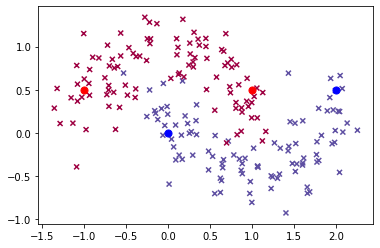

In [19]:
X_predict=[[-1,0.5],[0,0],[1,0.5],[2,0.5]]

def predict(X_predict):

    X_plot=np.array(X_predict)

    def color(output):
        if output[0]<0.5:
            return 'red'
        else:
            return 'blue'


    hidden_layer_input=np.dot(X_predict,weight_hidden)+bais_hidden
        #hidden_layer_input+=bais_hidden

        #print(hidden_layer_input)

    hidden_layer_activation=sigmoidd(hidden_layer_input)

    hidden_layer_activation=np.array(hidden_layer_activation)

    output_layer_input=np.dot(hidden_layer_activation,weight_output)
    output_layer_input+=bais_output
    output=sigmoidd(output_layer_input)
    print(output)

    plt.scatter(X[:,0], X[:,1], s=25, c=b,marker='x',cmap=plt.cm.Spectral)
    for i in range(len(X_plot)):
        plt.scatter(X_plot[i][0],X_plot[i][1],c=color(output[i]),s=50)
        
predict(X_predict)

[[0.8986745203922628], [0.8986130432095765], [0.8982905542697908], [0.8965968349771721], [0.8876808586062529], [0.8413226006750902], [0.654367174178237], [0.35177926036972545], [0.17047204020543494], [0.117683388029709], [0.10643713721984756], [0.10416475008600397], [0.10370880129281446], [0.10361741111867853], [0.10359909329368573], [0.10359542111456749], [0.10359468480049147], [0.10359453713097407], [0.10359450750971767], [0.10359450156683829], [0.10359450037431417], [0.10359450013497669], [0.10359450008693445], [0.1035945000772894], [0.10359450007535285], [0.8986802983797222], [0.8986433591196392], [0.8984497386880682], [0.8974337690067098], [0.8920911713662347], [0.8640164827980568], [0.7334353009012923], [0.43830270826512746], [0.20731912823063897], [0.12639378041882315], [0.10822118690384351], [0.10452333975542165], [0.10378067434611564], [0.10363181172552727], [0.10360197894942237], [0.10359599947032418], [0.10359480074133416], [0.10359456037791716], [0.10359451217179186], [0.10

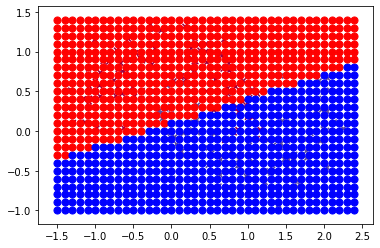

In [20]:
x_lower=-1.5
x_upper=2.5
y_lower=-1
y_upper=1.5
xx=[]
for i in np.arange(x_lower,x_upper,0.1):
    for j in np.arange(y_lower,y_upper,0.1):
        xx.append([i,j])
#print(xx)

predict(xx)

In [21]:
output[0]

[0.1923766803008301]